<font color="#CA0032"><h1 align="left">**Cajamar Water Footprint**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Predicción de series temporales**</h1></font>

<h2 align="left">Tur-IA</h2>

## <font color="#CA3532"> **1. Importar librerías**

In [49]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import time

%matplotlib inline
# fijo la semilla aleatoria por reproducibilidad
np.random.seed(123)

## <font color="#CA3532"> **2. Carga de datos**

In [3]:
data = pd.read_table('Modelar_UH2022.txt', sep='|')
data.head()

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10,369356,0.0,28,0.0


In [4]:
data.shape

(21404828, 6)

In [5]:
data.describe()

,ID,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
count,2.140483e+07,2.140483e+07,2.126477e+07,2.140483e+07,2.126477e+07
mean,1.259029e+03,6.052178e+05,3.930737e+00,2.277017e+01,4.228367e+00
std,7.334956e+02,2.857464e+06,1.496893e+01,1.516794e+03,1.541059e+01
min,0.000000e+00,-6.407800e+04,0.000000e+00,-5.307340e+05,0.000000e+00
25%,6.230000e+02,6.368800e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.255000e+03,1.831570e+05,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.887000e+03,3.520500e+05,0.000000e+00,9.000000e+00,0.000000e+00
max,2.756000e+03,5.108976e+07,9.900000e+01,9.499810e+05,9.900000e+01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21404828 entries, 0 to 21404827
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 int64  
 1   SAMPLETIME         object 
 2   READINGINTEGER     int64  
 3   READINGTHOUSANDTH  float64
 4   DELTAINTEGER       int64  
 5   DELTATHOUSANDTH    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 979.8+ MB


In [7]:
data.isnull().sum()

ID                        0
SAMPLETIME                0
READINGINTEGER            0
READINGTHOUSANDTH    140056
DELTAINTEGER              0
DELTATHOUSANDTH      140056
dtype: int64

In [8]:
data[data['READINGTHOUSANDTH'].isnull()]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
2085142,248,2019-06-13 18:30:00,26752630,NaN,0,NaN
2085143,248,2019-06-13 04:30:00,26676570,NaN,3290,NaN
2085144,248,2019-06-13 16:30:00,26752630,NaN,0,NaN
2085145,248,2019-06-13 18:45:00,26752630,NaN,0,NaN
2085146,248,2019-06-13 09:45:00,26736300,NaN,2780,NaN
...,...,...,...,...,...,...
12101320,1416,2020-01-25 11:00:00,30935150,NaN,250,NaN
12101321,1416,2020-01-25 09:30:00,30933640,NaN,260,NaN
12101322,1416,2020-01-25 16:00:00,30940130,NaN,250,NaN
12101323,1416,2020-01-26 06:00:00,30954430,NaN,270,NaN


Como los valores nulos son los decimales y la información que aportan no puede ser muy relevante, los sustituimos por 0

In [9]:
data['READINGTHOUSANDTH'] = data['READINGTHOUSANDTH'].fillna(0)
data['DELTATHOUSANDTH'] = data['DELTATHOUSANDTH'].fillna(0)

In [10]:
data.isnull().sum()

ID                   0
SAMPLETIME           0
READINGINTEGER       0
READINGTHOUSANDTH    0
DELTAINTEGER         0
DELTATHOUSANDTH      0
dtype: int64

Vamos a ver que aspecto tiene la columna de los decimales:

In [11]:
data[data['READINGTHOUSANDTH']>0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
589,0,2020-01-19 07:00:00,430762,8.0,17,4.0
592,0,2020-01-19 08:00:00,430780,2.0,17,4.0
604,0,2020-01-19 09:00:00,430797,6.0,17,4.0
608,0,2020-01-19 06:00:00,430745,4.0,17,4.0
744,0,2019-07-30 10:00:00,383731,2.0,8,8.0
...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0


In [12]:
data[data['READINGTHOUSANDTH']>0]['READINGTHOUSANDTH'].unique()

array([ 8.,  2.,  6.,  4., 43., 86., 14., 71., 29., 57., 62., 85., 23.,
       69., 46., 38., 31., 15., 54., 92., 41., 35., 65., 88., 47., 12.,
       24., 94., 76., 59., 82., 18., 53., 67., 33., 64.,  7., 51., 13.,
       56., 11., 27., 42., 98., 84., 44., 77., 22., 89., 78., 52., 16.,
       32., 96., 36., 48., 68., 72., 28., 97., 79.,  9., 17., 83., 21.,
       45., 93.,  1., 34., 66., 55.,  3., 73., 87., 58., 49., 91., 39.,
        5., 63., 37., 61., 95., 19., 81., 26., 75., 25., 74., 99.])

Los decimales van entre 0 y 99, así que hacemos una función que divida entre 100 todos aquellos que estén entre 10 y 99, mientras que los queestén entre 1 y 9 los divida entre 10. De esta manera obtenemos la parte decimal para sumarla directamente a la parte entera:

In [13]:
data['READINGTHOUSANDTH_MOD'] = np.where(data['READINGTHOUSANDTH']>9, data['READINGTHOUSANDTH']/100., data['READINGTHOUSANDTH']/10)
data[data['READINGTHOUSANDTH']>0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,READINGTHOUSANDTH_MOD
589,0,2020-01-19 07:00:00,430762,8.0,17,4.0,0.80
592,0,2020-01-19 08:00:00,430780,2.0,17,4.0,0.20
604,0,2020-01-19 09:00:00,430797,6.0,17,4.0,0.60
608,0,2020-01-19 06:00:00,430745,4.0,17,4.0,0.40
744,0,2019-07-30 10:00:00,383731,2.0,8,8.0,0.20
...,...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0,0.55
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0,0.26
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0,0.19
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0,0.68


In [14]:
data[data['READINGTHOUSANDTH']>0]['READINGTHOUSANDTH_MOD'].unique()

array([0.8 , 0.2 , 0.6 , 0.4 , 0.43, 0.86, 0.14, 0.71, 0.29, 0.57, 0.62,
       0.85, 0.23, 0.69, 0.46, 0.38, 0.31, 0.15, 0.54, 0.92, 0.41, 0.35,
       0.65, 0.88, 0.47, 0.12, 0.24, 0.94, 0.76, 0.59, 0.82, 0.18, 0.53,
       0.67, 0.33, 0.64, 0.7 , 0.51, 0.13, 0.56, 0.11, 0.27, 0.42, 0.98,
       0.84, 0.44, 0.77, 0.22, 0.89, 0.78, 0.52, 0.16, 0.32, 0.96, 0.36,
       0.48, 0.68, 0.72, 0.28, 0.97, 0.79, 0.9 , 0.17, 0.83, 0.21, 0.45,
       0.93, 0.1 , 0.34, 0.66, 0.55, 0.3 , 0.73, 0.87, 0.58, 0.49, 0.91,
       0.39, 0.5 , 0.63, 0.37, 0.61, 0.95, 0.19, 0.81, 0.26, 0.75, 0.25,
       0.74, 0.99])

El resultado definitivo lo almacenamos en una nueva columna READING:

In [15]:
data['READING'] = data['READINGINTEGER'] + data['READINGTHOUSANDTH_MOD']
data[data['READINGTHOUSANDTH']>0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,READINGTHOUSANDTH_MOD,READING
589,0,2020-01-19 07:00:00,430762,8.0,17,4.0,0.80,430762.80
592,0,2020-01-19 08:00:00,430780,2.0,17,4.0,0.20,430780.20
604,0,2020-01-19 09:00:00,430797,6.0,17,4.0,0.60,430797.60
608,0,2020-01-19 06:00:00,430745,4.0,17,4.0,0.40,430745.40
744,0,2019-07-30 10:00:00,383731,2.0,8,8.0,0.20,383731.20
...,...,...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0,0.55,462808.55
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0,0.26,462335.26
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0,0.19,463045.19
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0,0.68,462436.68


In [16]:
data[data['READINGTHOUSANDTH']>9]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,READINGTHOUSANDTH_MOD,READING
8798,1,2019-06-15 21:00:00,7814,43.0,7,71.0,0.43,7814.43
8799,1,2019-06-15 23:00:00,7829,86.0,7,71.0,0.86,7829.86
8806,1,2019-06-15 22:00:00,7822,14.0,7,71.0,0.14,7822.14
8807,1,2019-06-15 20:00:00,7806,71.0,7,71.0,0.71,7806.71
8815,1,2019-06-16 05:00:00,7876,14.0,7,71.0,0.14,7876.14
...,...,...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0,0.55,462808.55
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0,0.26,462335.26
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0,0.19,463045.19
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0,0.68,462436.68


Realizamosel mismo proceso en este caso para unir la parte entera y decimal del valor DELTA

In [17]:
data[data['DELTATHOUSANDTH']>0]['DELTATHOUSANDTH'].unique()

array([ 4.,  8.,  2.,  6., 71., 69., 35., 67.,  5., 38., 29., 44., 33.,
       18., 62., 23., 78., 72.,  9., 11., 12., 56., 89., 31., 22., 39.,
       47., 85., 77., 92., 34., 41., 81., 15., 24., 82., 46., 54.,  1.,
       86., 53., 48., 94., 17., 68., 19., 88., 59., 83.,  7., 52., 76.,
       36., 14., 43., 84., 65., 73., 95., 16., 32., 57.,  3., 64., 37.,
       49., 75., 45., 55., 79., 42., 98., 66., 97., 21., 91., 87., 99.,
       74., 25., 28., 51., 93., 96., 27., 63., 61., 58., 26., 13.])

In [18]:
data['DELTATHOUSANDTH_MOD'] = np.where(data['DELTATHOUSANDTH']>9, data['DELTATHOUSANDTH']/100., data['DELTATHOUSANDTH']/10)
data[data['DELTATHOUSANDTH']>0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,READINGTHOUSANDTH_MOD,READING,DELTATHOUSANDTH_MOD
589,0,2020-01-19 07:00:00,430762,8.0,17,4.0,0.80,430762.80,0.40
592,0,2020-01-19 08:00:00,430780,2.0,17,4.0,0.20,430780.20,0.40
604,0,2020-01-19 09:00:00,430797,6.0,17,4.0,0.60,430797.60,0.40
606,0,2020-01-19 10:25:17,430815,0.0,17,4.0,0.00,430815.00,0.40
608,0,2020-01-19 06:00:00,430745,4.0,17,4.0,0.40,430745.40,0.40
...,...,...,...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0,0.55,462808.55,0.81
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0,0.26,462335.26,0.81
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0,0.19,463045.19,0.81
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0,0.68,462436.68,0.81


In [19]:
data[data['DELTATHOUSANDTH']>0]['DELTATHOUSANDTH_MOD'].unique()

array([0.4 , 0.8 , 0.2 , 0.6 , 0.71, 0.69, 0.35, 0.67, 0.5 , 0.38, 0.29,
       0.44, 0.33, 0.18, 0.62, 0.23, 0.78, 0.72, 0.9 , 0.11, 0.12, 0.56,
       0.89, 0.31, 0.22, 0.39, 0.47, 0.85, 0.77, 0.92, 0.34, 0.41, 0.81,
       0.15, 0.24, 0.82, 0.46, 0.54, 0.1 , 0.86, 0.53, 0.48, 0.94, 0.17,
       0.68, 0.19, 0.88, 0.59, 0.83, 0.7 , 0.52, 0.76, 0.36, 0.14, 0.43,
       0.84, 0.65, 0.73, 0.95, 0.16, 0.32, 0.57, 0.3 , 0.64, 0.37, 0.49,
       0.75, 0.45, 0.55, 0.79, 0.42, 0.98, 0.66, 0.97, 0.21, 0.91, 0.87,
       0.99, 0.74, 0.25, 0.28, 0.51, 0.93, 0.96, 0.27, 0.63, 0.61, 0.58,
       0.26, 0.13])

EL resultado lo almacenamos en otra columna nueva con el nombre DELTA

In [20]:
data['DELTA'] = data['DELTAINTEGER'] + data['DELTATHOUSANDTH_MOD']
data[data['DELTATHOUSANDTH']>0]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,READINGTHOUSANDTH_MOD,READING,DELTATHOUSANDTH_MOD,DELTA
589,0,2020-01-19 07:00:00,430762,8.0,17,4.0,0.80,430762.80,0.40,17.40
592,0,2020-01-19 08:00:00,430780,2.0,17,4.0,0.20,430780.20,0.40,17.40
604,0,2020-01-19 09:00:00,430797,6.0,17,4.0,0.60,430797.60,0.40,17.40
606,0,2020-01-19 10:25:17,430815,0.0,17,4.0,0.00,430815.00,0.40,17.40
608,0,2020-01-19 06:00:00,430745,4.0,17,4.0,0.40,430745.40,0.40,17.40
...,...,...,...,...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0,0.55,462808.55,0.81,33.81
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0,0.26,462335.26,0.81,33.81
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0,0.19,463045.19,0.81,33.81
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0,0.68,462436.68,0.81,33.81


In [21]:
data[data['DELTATHOUSANDTH']>9]

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,READINGTHOUSANDTH_MOD,READING,DELTATHOUSANDTH_MOD,DELTA
8798,1,2019-06-15 21:00:00,7814,43.0,7,71.0,0.43,7814.43,0.71,7.71
8799,1,2019-06-15 23:00:00,7829,86.0,7,71.0,0.86,7829.86,0.71,7.71
8806,1,2019-06-15 22:00:00,7822,14.0,7,71.0,0.14,7822.14,0.71,7.71
8807,1,2019-06-15 20:00:00,7806,71.0,7,71.0,0.71,7806.71,0.71,7.71
8815,1,2019-06-16 05:00:00,7876,14.0,7,71.0,0.14,7876.14,0.71,7.71
...,...,...,...,...,...,...,...,...,...,...
21404783,2745,2019-10-14 15:00:00,462808,55.0,33,81.0,0.55,462808.55,0.81,33.81
21404784,2745,2019-10-14 01:00:00,462335,26.0,33,81.0,0.26,462335.26,0.81,33.81
21404785,2745,2019-10-14 22:00:00,463045,19.0,33,81.0,0.19,463045.19,0.81,33.81
21404786,2745,2019-10-14 04:00:00,462436,68.0,33,81.0,0.68,462436.68,0.81,33.81


Nos creamos un nuevo DataFrame que contenga solo aquellas columnas que nos interesan a partir de ahora para nuestro problema:

In [22]:
data_final = data.drop(['READINGINTEGER', 'READINGTHOUSANDTH', 'DELTAINTEGER', 'DELTATHOUSANDTH', 'READINGTHOUSANDTH_MOD', 'DELTATHOUSANDTH_MOD'], axis=1)

In [23]:
data_final

,ID,SAMPLETIME,READING,DELTA
0,0,2019-06-13 08:34:09,369320.0,17.0
1,0,2019-06-13 17:34:10,369403.0,2.0
2,0,2019-06-13 18:34:10,369403.0,0.0
3,0,2019-06-13 04:34:10,369284.0,1.0
4,0,2019-06-13 14:34:10,369356.0,28.0
...,...,...,...,...
21404823,2749,2019-10-11 06:27:14,164505.0,0.0
21404824,2756,2019-04-06 05:50:17,349758.0,0.0
21404825,2756,2019-04-06 07:50:17,349770.0,12.0
21404826,2756,2019-04-06 04:50:17,349758.0,0.0


AttributeError: 'Series' object has no attribute 'day_of_year'

In [24]:
data_final.isnull().sum()

ID            0
SAMPLETIME    0
READING       0
DELTA         0
dtype: int64

## <font color="#CA3532"> **3. Preprocesado inicial y visualización de datos**

In [29]:
type(data_final['SAMPLETIME'][0])

str

In [30]:
# La fecha es un string, la pasamos a formato fecha de pandas:
data_final['SAMPLETIME'] = pd.to_datetime(data_final['SAMPLETIME'])
type(data_final['SAMPLETIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
data_final['SAMPLETIME']

0          2019-06-13 08:34:09
1          2019-06-13 17:34:10
2          2019-06-13 18:34:10
3          2019-06-13 04:34:10
4          2019-06-13 14:34:10
                   ...        
21404823   2019-10-11 06:27:14
21404824   2019-04-06 05:50:17
21404825   2019-04-06 07:50:17
21404826   2019-04-06 04:50:17
21404827   2019-04-06 06:50:17
Name: SAMPLETIME, Length: 21404828, dtype: datetime64[ns]

In [61]:
data_final['DAY_YEAR'] = data_final['SAMPLETIME'].dt.dayofyear
data_final['DAY'] = data_final['SAMPLETIME'].dt.day
data_final['MONTH'] = data_final['SAMPLETIME'].dt.month
data_final['YEAR'] = data_final['SAMPLETIME'].dt.year
data_final['DATE'] = data_final['SAMPLETIME'].dt.date

data_final

,ID,SAMPLETIME,READING,DELTA,DAY_YEAR,DAY,MONTH,YEAR,DATE
0,0,2019-06-13 08:34:09,369320.0,17.0,164,13,6,2019,2019-06-13
1,0,2019-06-13 17:34:10,369403.0,2.0,164,13,6,2019,2019-06-13
2,0,2019-06-13 18:34:10,369403.0,0.0,164,13,6,2019,2019-06-13
3,0,2019-06-13 04:34:10,369284.0,1.0,164,13,6,2019,2019-06-13
4,0,2019-06-13 14:34:10,369356.0,28.0,164,13,6,2019,2019-06-13
...,...,...,...,...,...,...,...,...,...
21404823,2749,2019-10-11 06:27:14,164505.0,0.0,284,11,10,2019,2019-10-11
21404824,2756,2019-04-06 05:50:17,349758.0,0.0,96,6,4,2019,2019-04-06
21404825,2756,2019-04-06 07:50:17,349770.0,12.0,96,6,4,2019,2019-04-06
21404826,2756,2019-04-06 04:50:17,349758.0,0.0,96,6,4,2019,2019-04-06


In [70]:
data_cont_0 = data_final[data_final['ID'] == 0]
data_cont_0.sort_values('SAMPLETIME', inplace=True)
data_cont_0

<ipython-input-70-173ba0211841>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cont_0.sort_values('SAMPLETIME', inplace=True)


,ID,SAMPLETIME,READING,DELTA,DAY_YEAR,DAY,MONTH,YEAR,DATE
160,0,2019-02-01 00:39:36,331710.0,0.0,32,1,2,2019,2019-02-01
152,0,2019-02-01 01:39:36,331710.0,0.0,32,1,2,2019,2019-02-01
150,0,2019-02-01 02:39:35,331710.0,0.0,32,1,2,2019,2019-02-01
156,0,2019-02-01 03:39:35,331710.0,0.0,32,1,2,2019,2019-02-01
161,0,2019-02-01 04:39:35,331710.0,0.0,32,1,2,2019,2019-02-01
...,...,...,...,...,...,...,...,...,...
5110,0,2020-01-31 19:24:45,434941.0,3.0,31,31,1,2020,2020-01-31
5112,0,2020-01-31 20:24:45,434951.0,10.0,31,31,1,2020,2020-01-31
5114,0,2020-01-31 21:24:45,434952.0,1.0,31,31,1,2020,2020-01-31
5109,0,2020-01-31 22:24:45,434961.0,9.0,31,31,1,2020,2020-01-31


In [72]:
data_cont_0_mean = data_cont_0.groupby(['DATE']).mean()
data_cont_0_mean

,ID,READING,DELTA,DAY_YEAR,DAY,MONTH,YEAR
DATE,,,,,,,
2019-02-01,0,331806.625000,10.125000,32,1,2,2019
2019-02-02,0,332045.666667,9.833333,33,2,2,2019
2019-02-03,0,332302.625000,13.958333,34,3,2,2019
2019-02-04,0,332601.083333,10.500000,35,4,2,2019
2019-02-05,0,332873.833333,9.166667,36,5,2,2019
...,...,...,...,...,...,...,...
2020-01-27,0,433500.416667,8.875000,27,27,1,2020
2020-01-28,0,433725.875000,9.666667,28,28,1,2020
2020-01-29,0,434032.083333,16.791667,29,29,1,2020


In [75]:
fechas = data_cont_0_mean.index
target = data_cont_0_mean['READING'].values

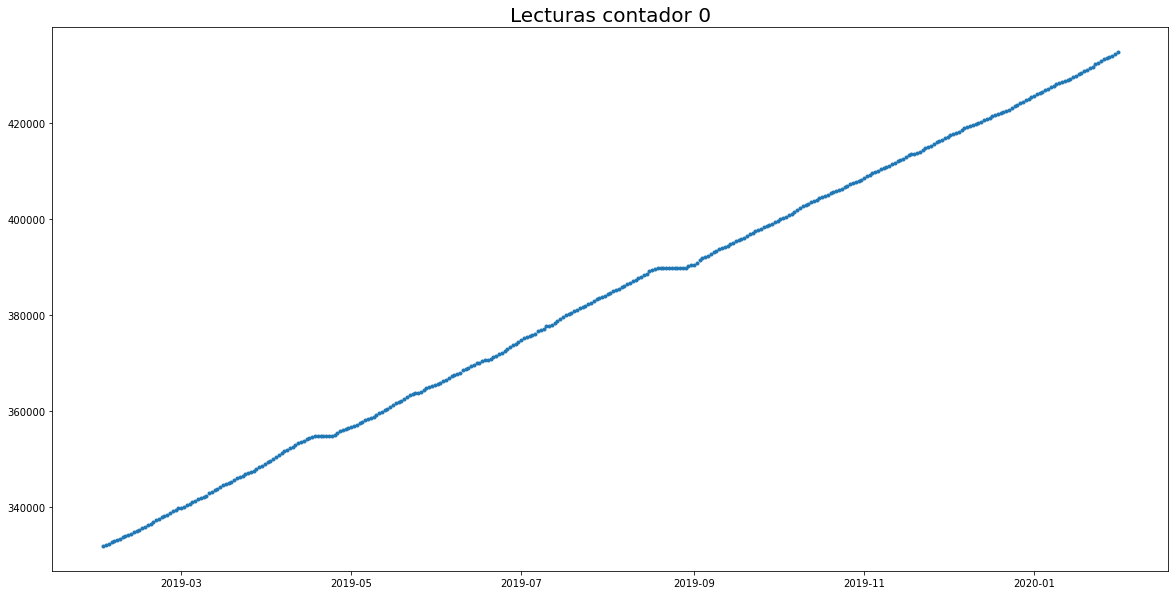

In [80]:
plt.figure(figsize=(20,10))
plt.plot(fechas, target, '.')
plt.title('Lecturas contador 0',
          fontsize=20);

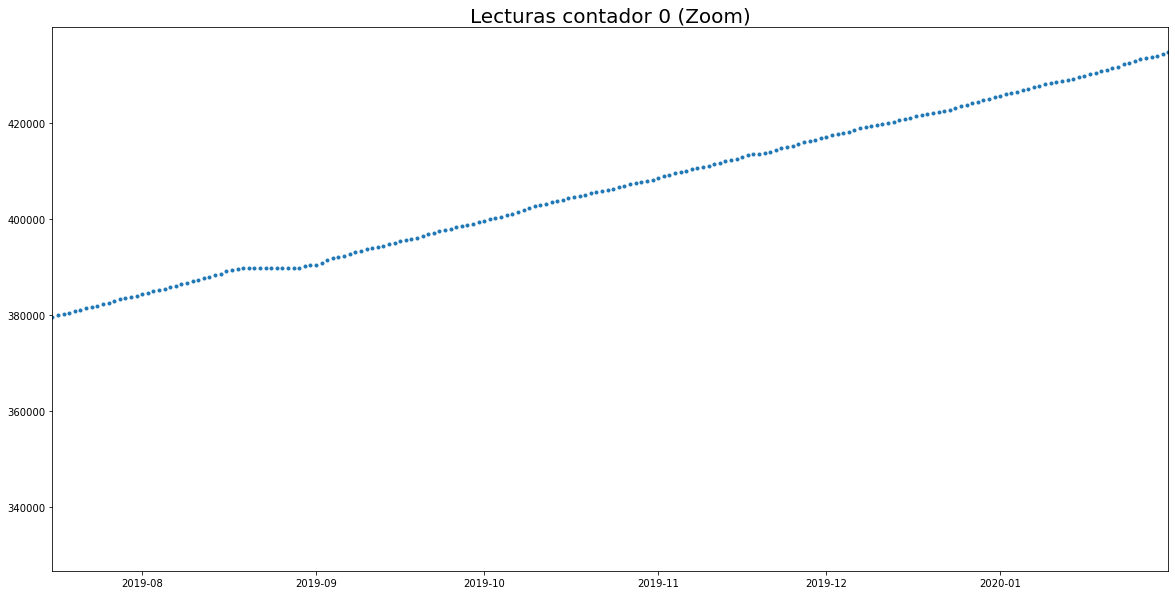

In [83]:
plt.figure(figsize=(20,10))
plt.plot(fechas, target, '.')
plt.title('Lecturas contador 0 (Zoom)', fontsize=20)
plt.xlim([fechas[-200],fechas[-1]]);

In [84]:
fechas = data_cont_0_mean.index
target = data_cont_0_mean['DELTA'].values

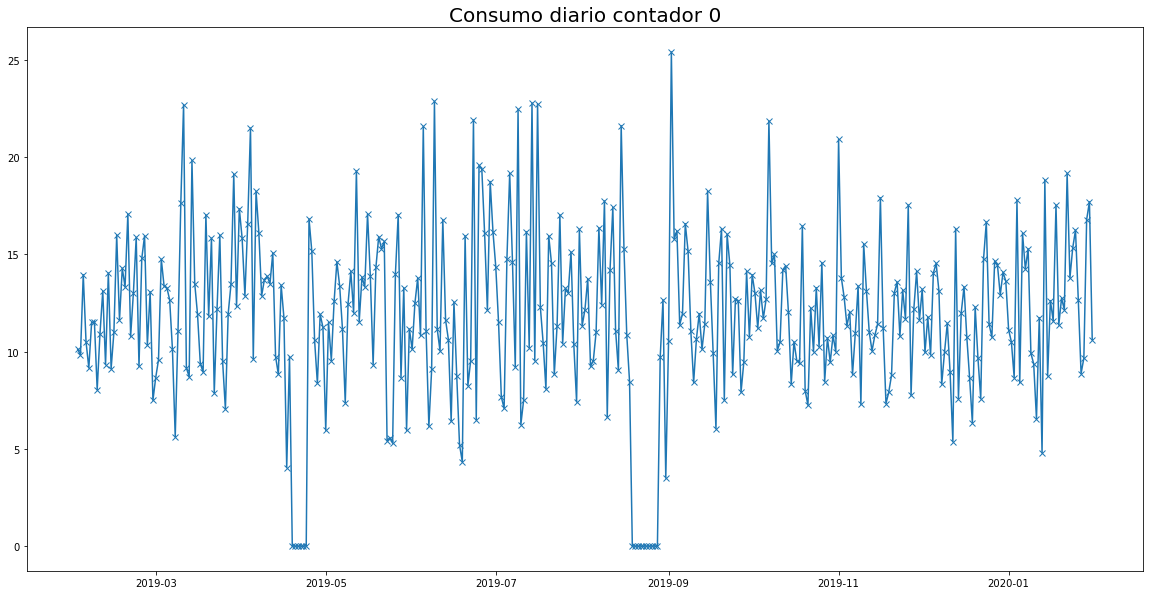

In [87]:
plt.figure(figsize=(20,10))
plt.plot(fechas, target, 'x-')
plt.title('Consumo diario contador 0',
          fontsize=20);